# Compare CPL hist. file and table against MOM6

## bmom.e23.f09_t061_zstar_N65.nuopc.nuopc_short.004 
This is a 2-year run using out-of-the-box BMOM. Budgets are calculated using yearly means.

In [1]:
%matplotlib inline

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mom6_tools.MOM6grid import MOM6grid
from mom6_tools.m6plot import xyplot

Basemap module not found. Some regional plots may not function properly


In [2]:
path= '/glade/scratch/gmarques/bmom.e23.f09_t061_zstar_N65.nuopc.nuopc_short.004/run/'
grd = MOM6grid(path+'bmom.e23.f09_t061_zstar_N65.nuopc.nuopc_short.004.mom6.static.nc')
area = np.ma.masked_where(grd.wet==0,grd.area_t)
grd_xr = MOM6grid(path+'bmom.e23.f09_t061_zstar_N65.nuopc.nuopc_short.004.mom6.static.nc', xrformat=True)

C_P = 3992.0 
latent_heat_fusion = 3.337E+05
latent_heat_vapor = 2.501E+06

MOM6 grid successfully loaded... 

MOM6 grid successfully loaded... 



## Year 1

### Load data 

In [3]:
ds_mom =  xr.open_dataset(path+'bmom.e23.f09_t061_zstar_N65.nuopc.nuopc_short.004.mom6.frc_0001.nc')

/glade/work/gmarques/miniconda/envs/dev/lib/python3.9/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [4]:
print('Times: ',ds_mom.time.values[:])

Times:  [cftime.DatetimeNoLeap(1, 7, 2, 12, 0, 0, 0, has_year_zero=True)]


In [5]:
ds_cpl = xr.open_dataset(path+'bmom.e23.f09_t061_zstar_N65.nuopc.nuopc_short.004.cpl.hi.0002-01-01-00000.nc')

In [6]:
ds_cpl.time.values

array([cftime.DatetimeNoLeap(2, 1, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)

### Areas

In [7]:
n=0
# areas
#earth_rad = 6.37122e6 # in m (from shr_constants)
earth_rad = 6.378e6 # in m (from MOM6)

model_area = grd.area_t / (earth_rad**2)
med_area = ds_cpl.MED_ocn_area[n,:].values
#med_area = ds_cpl.MED_ocn_area[n,:].values

#med2mod_areacor = med_area/model_area
#mod2med_areacor = model_area/med_area

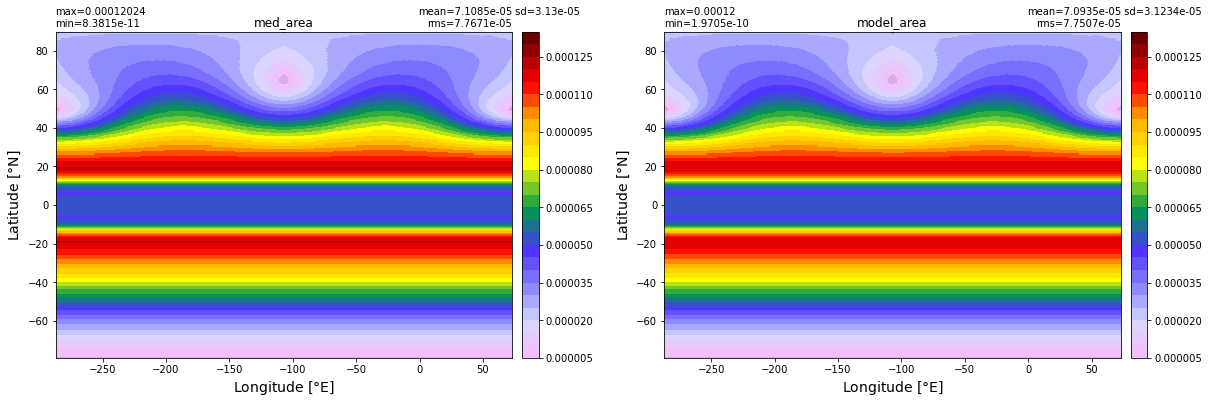

In [8]:
%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
ax1 = ax.flatten()

xyplot(med_area,grd.geolon, grd.geolat, grd.area_t, axis=ax1[0], title='med_area')
xyplot(model_area,grd.geolon, grd.geolat, grd.area_t, axis=ax1[1], title='model_area')


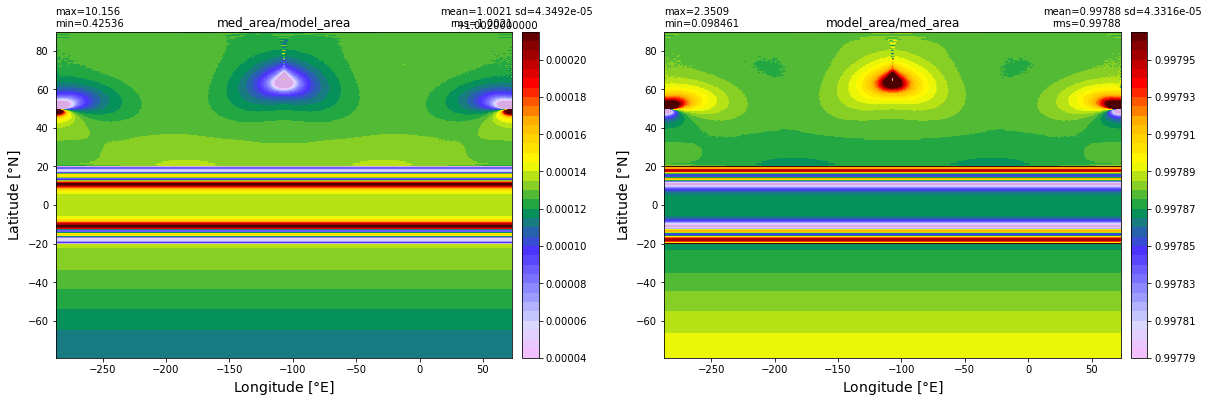

In [9]:
%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
ax1 = ax.flatten()

#med2mod_areacor = np.ma.masked_where(grd.wet==0,med_area/model_area)
#mod2med_areacor = np.ma.masked_where(grd.wet==0,model_area/med_area)

med2mod_areacor = med_area/model_area
mod2med_areacor = model_area/med_area

xyplot(med2mod_areacor,grd.geolon, grd.geolat, area, axis=ax1[0], title='med_area/model_area')
xyplot(mod2med_areacor,grd.geolon, grd.geolat, area, axis=ax1[1], title='model_area/med_area')


In [10]:
n=0
print(ds_mom.time[n].values)
net_heat_surface = np.nan_to_num(ds_mom.net_heat_surface[n,:].values) * mod2med_areacor
net_heat_coupler1 = np.nan_to_num(ds_mom.net_heat_coupler[n,:].values)* mod2med_areacor
sensible = np.nan_to_num(ds_mom.sensible[n,:].values)* mod2med_areacor
latent = np.nan_to_num(ds_mom.latent[n,:].values)* mod2med_areacor
SW = np.nan_to_num(ds_mom.SW[n,:].values)* mod2med_areacor
LW = np.nan_to_num(ds_mom.LW[n,:].values)* mod2med_areacor
Heat_PmE = np.nan_to_num(ds_mom.Heat_PmE[n,:].values)* mod2med_areacor
seaice_melt_heat = np.nan_to_num(ds_mom.seaice_melt_heat[n,:].values)* mod2med_areacor
net_heat_coupler2 = sensible + latent + SW + LW + seaice_melt_heat
frazil = np.nan_to_num(ds_mom.frazil[n,:].values)* mod2med_areacor
latent_evap= np.nan_to_num(ds_mom.latent_evap[n,:].values)* mod2med_areacor
latent_fprec_diag= np.nan_to_num(ds_mom.latent_fprec_diag[n,:].values)* mod2med_areacor
latent_frunoff= np.nan_to_num(ds_mom.latent_frunoff[n,:].values)* mod2med_areacor
temp_int = np.nan_to_num(ds_mom.temp_int[n,:].values)* mod2med_areacor

heat_content_lrunoff = np.ma.masked_invalid(ds_mom.heat_content_lrunoff[n,:].values)* mod2med_areacor
heat_content_frunoff = np.ma.masked_invalid(ds_mom.heat_content_frunoff[n,:].values)* mod2med_areacor
heat_content_icemelt = np.ma.masked_invalid(ds_mom.heat_content_icemelt[n,:].values)* mod2med_areacor
heat_content_lprec = np.ma.masked_invalid(ds_mom.heat_content_lprec[n,:].values)* mod2med_areacor
heat_content_fprec = np.ma.masked_invalid(ds_mom.heat_content_fprec[n,:].values)* mod2med_areacor
heat_content_cond = np.ma.masked_invalid(ds_mom.heat_content_cond[n,:].values)* mod2med_areacor
heat_content_massout = np.ma.masked_invalid(ds_mom.heat_content_massout[n,:].values)* mod2med_areacor
heat_content_massin = np.ma.masked_invalid(ds_mom.heat_content_massin[n,:].values)* mod2med_areacor
heat_content_surfwater = np.ma.masked_invalid(ds_mom.heat_content_surfwater[n,:].values)* mod2med_areacor

# mass
evap= np.nan_to_num(ds_mom.evap[n,:].values)* mod2med_areacor * 1.0e6
lprec= np.nan_to_num(ds_mom.lprec[n,:].values)* mod2med_areacor * 1.0e6
fprec = np.ma.masked_invalid(ds_mom.fprec[n,:].values)* mod2med_areacor * 1.0e6
frunoff = np.ma.masked_invalid(ds_mom.frunoff[n,:].values)* mod2med_areacor * 1.0e6
lrunoff = np.ma.masked_invalid(ds_mom.lrunoff[n,:].values)* mod2med_areacor * 1.0e6
seaice_melt = np.ma.masked_invalid(ds_mom.seaice_melt[n,:].values)* mod2med_areacor * 1.0e6
salt_flux = np.ma.masked_invalid(ds_mom.salt_flux[n,:].values)* mod2med_areacor * 1.0e6

0001-07-02 12:00:00


### CPL budget tables 

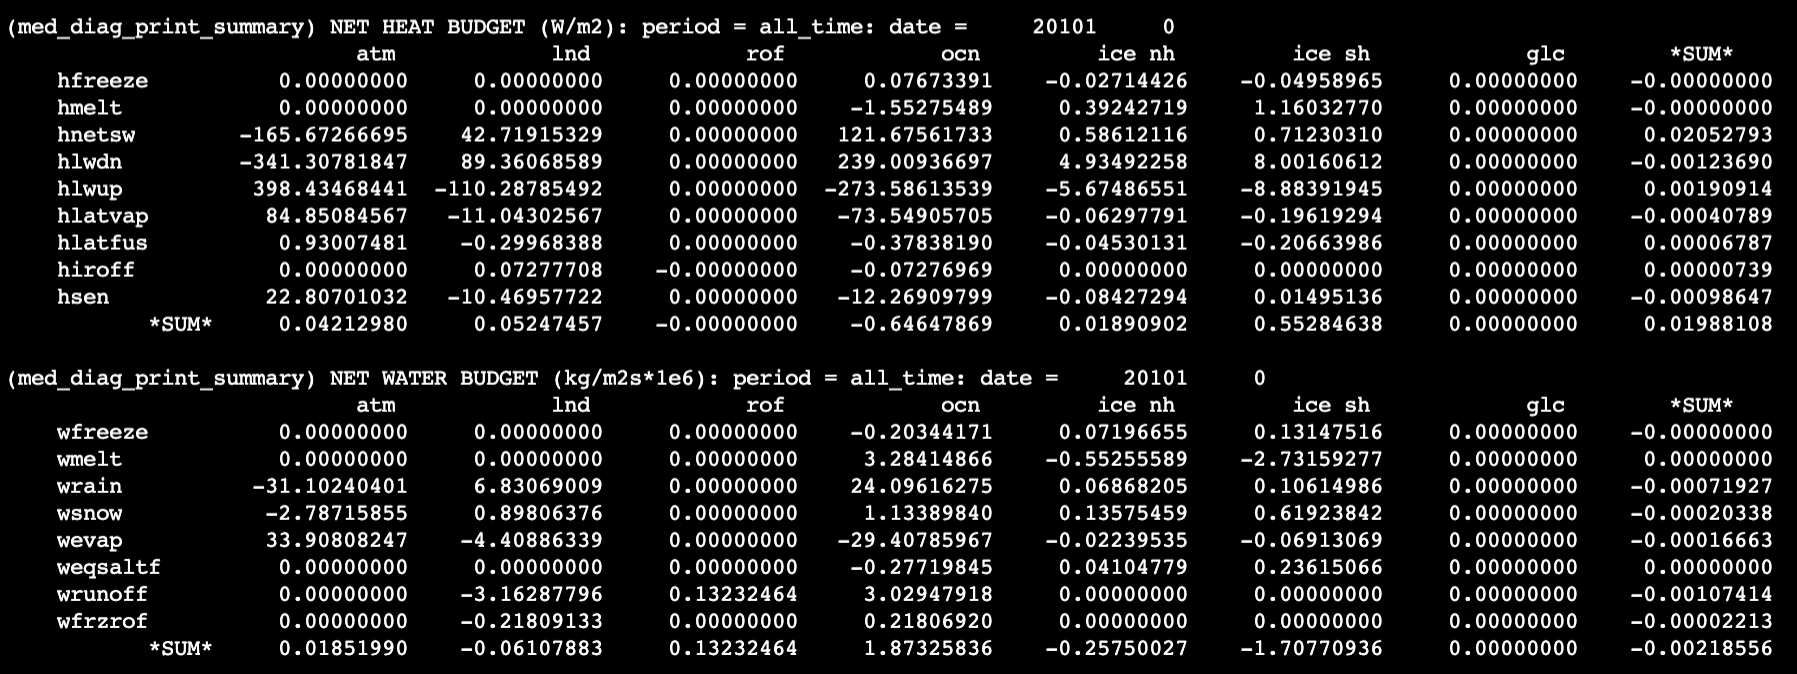

### Table vs MOM6

In [11]:
heat_table = [0.07673391, -1.55275489, 121.67561733, 
              239.00936697-273.58613539, -73.54905705,
             -0.37838190, -0.07276969, -12.26909799]
heat_table_terms = ['hfreeze','hmelt','SW','LW','LAT_EVAP','LAT_FUS','HIROFF','SEN']
water_table = [0., 3.28414866, 24.09616275,
              1.13389840, -29.40785967, 0., 
              3.02947918, 0.21806920]
water_table_terms = ['wfreeze','wmelt','rain','snow','evap','weqsaltf','wrunoff','wfrzrof']

In [12]:
heat_mom = np.zeros(len(heat_table))
area = 4*np.pi
# frazil or hfreeze
heat_mom[0] = ((frazil*med_area).sum())/area 
# hmelt
heat_mom[1] = ((seaice_melt_heat*med_area).sum())/area 
# SW
heat_mom[2] = ((SW*med_area).sum())/area 
# LW
heat_mom[3] = ((LW*med_area).sum())/area
# latent_evap
heat_mom[4] = ((latent_evap*med_area).sum())/area
# latent_fprec_diag
heat_mom[5] = ((latent_fprec_diag*med_area).sum())/area
# latent_frunoff
heat_mom[6] = ((latent_frunoff*med_area).sum())/area
# sensible
heat_mom[7] = ((sensible*med_area).sum())/area

In [13]:
print('------------------ YEAR 1 --------------------')
print('{:>10s} {:>10s} {:>10s} {:>10s}'.format('VARIABLE','MOM6','TABLE','MOM-TABLE'))
print('----------------------------------------------')
for i in range(len(heat_mom)):
    print('{:>10s} {:10.6f} {:10.6f} {:10.6f}'.format(heat_table_terms[i],
        heat_mom[i],heat_table[i],heat_mom[i]-heat_table[i]))
print('----------------------------------------------')
print('{:>10s} {:10.6f} {:10.6f} {:10.6f}'.format('SUM',
        np.sum(heat_mom),np.sum(heat_table),
        np.sum(heat_mom)-np.sum(heat_table)))

------------------ YEAR 1 --------------------
  VARIABLE       MOM6      TABLE  MOM-TABLE
----------------------------------------------
   hfreeze   0.076745   0.076734   0.000011
     hmelt  -1.552707  -1.552755   0.000048
        SW 121.673702 121.675617  -0.001915
        LW -34.576621 -34.576768   0.000148
  LAT_EVAP -73.547831 -73.549057   0.001226
   LAT_FUS  -0.378402  -0.378382  -0.000020
    HIROFF  -0.072773  -0.072770  -0.000003
       SEN -12.268701 -12.269098   0.000397
----------------------------------------------
       SUM  -0.646588  -0.646479  -0.000109


In [14]:
water_mom = np.zeros(len(water_table))

#water_table_terms = ['hfreeze','wmelt','rain','snow','evap','weqsaltf','wrunoff','wfrzrof']

# hfreeze
water_mom[0] = 0.0 #((frazil*med_area).sum())/area 
# wmelt
water_mom[1] = ((seaice_melt*med_area).sum())/area 
# rain
water_mom[2] = ((lprec*med_area).sum())/area 
# snow
water_mom[3] = ((fprec*med_area).sum())/area 
# evap
water_mom[4] = ((evap*med_area).sum())/area 
# water equivalent salt flux. Does this apply?
water_mom[5] = 0.0 #((salt_flux*med_area).sum())/area
# lrunoff
water_mom[6] = ((lrunoff*med_area).sum())/area
# frunoff
water_mom[7] = ((frunoff*med_area).sum())/area

In [15]:
print('------------------ YEAR 1 --------------------')
print('{:>10s} {:>10s} {:>10s} {:>10s}'.format('VARIABLE','MOM6','TABLE','MOM-TABLE'))
print('----------------------------------------------')
for i in range(len(water_mom)):
    print('{:>10s} {:10.6f} {:10.6f} {:10.6f}'.format(water_table_terms[i],
        water_mom[i],water_table[i],water_mom[i]-water_table[i]))
print('----------------------------------------------')
print('{:>10s} {:10.6f} {:10.6f} {:10.6f}'.format('SUM',
        np.sum(water_mom),np.sum(water_table),
        np.sum(water_mom)-np.sum(water_table)))

------------------ YEAR 1 --------------------
  VARIABLE       MOM6      TABLE  MOM-TABLE
----------------------------------------------
   wfreeze   0.000000   0.000000   0.000000
     wmelt   3.325843   3.284149   0.041694
      rain  24.097292  24.096163   0.001129
      snow   1.133959   1.133898   0.000060
      evap -29.407369 -29.407860   0.000490
  weqsaltf   0.000000   0.000000   0.000000
   wrunoff   3.029508   3.029479   0.000029
   wfrzrof   0.218078   0.218069   0.000008
----------------------------------------------
       SUM   2.397310   2.353899   0.043411


### Change in heat content check

dtomint = tomint[n] - tomint[n0]
dt      = time[n] - time[n0]
lhs     = cp * area * dtomint / dt

In [16]:
# year 1
hi = 1.9799490287319331E+25
hf = 1.9785552198940439E+25

In [17]:
n = 1 # year
heat = (hf-hi) / (grd.area_t.sum() * 3600. * 24 * 365 * n)
print('Change in heat from MOM log is {} W/m2'.format(heat))
print(cpl+heat)

Change in heat from MOM log is -0.8740917365798156 W/m2


NameError: name 'cpl' is not defined

### Figures

In [ ]:
%matplotlib inline

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(24,16))
ax1 = ax.flatten()
plt.suptitle('Heat terms')
xyplot(frazil,grd.geolon, grd.geolat, grd.area_t, axis=ax1[0], title='frazil')
xyplot(heat_content_icemelt,grd.geolon, grd.geolat, grd.area_t, axis=ax1[1], title='heat_content_icemelt')
xyplot(seaice_melt_heat,grd.geolon, grd.geolat, grd.area_t, axis=ax1[2], title='seaice_melt_heat')

xyplot(SW,grd.geolon, grd.geolat, grd.area_t, axis=ax1[3], title='SW')
xyplot(LW,grd.geolon, grd.geolat, grd.area_t, axis=ax1[4], title='LW')
xyplot(sensible,grd.geolon, grd.geolat, grd.area_t, axis=ax1[5], title='sensible')

xyplot(latent_evap,grd.geolon, grd.geolat, grd.area_t, axis=ax1[6], title='latent_evap')
xyplot(latent_fprec_diag,grd.geolon, grd.geolat, grd.area_t, axis=ax1[7], title='latent_fprec_diag')
xyplot(latent_frunoff,grd.geolon, grd.geolat, grd.area_t, axis=ax1[8], title='latent_frunoff')

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,12))
ax1 = ax.flatten()
plt.suptitle('Heat balance')

xyplot(Heat_PmE,grd.geolon, grd.geolat, grd.area_t, axis=ax1[0], title='Heat_PmE')
xyplot(net_heat_surface,grd.geolon, grd.geolat, grd.area_t, axis=ax1[1], title='net_heat_surface')
xyplot(net_heat_coupler1+frazil,grd.geolon, grd.geolat, grd.area_t, axis=ax1[2], title='net_heat_coupler')
xyplot(net_heat_surface-(net_heat_coupler1+frazil),grd.geolon, grd.geolat, grd.area_t, axis=ax1[3], title='CPL - MOM6')

## Year 2

### Load data 

In [ ]:
ds_mom =  xr.open_dataset(path+'bmom.e23.f09_t061_zstar_N65.nuopc.nuopc_short.004.mom6.frc_0002.nc')

In [ ]:
n=0
print(ds_mom.time[n].values)
net_heat_surface = np.nan_to_num(ds_mom.net_heat_surface[n,:].values) * mod2med_areacor
net_heat_coupler1 = np.nan_to_num(ds_mom.net_heat_coupler[n,:].values)* mod2med_areacor
sensible = np.nan_to_num(ds_mom.sensible[n,:].values)* mod2med_areacor
latent = np.nan_to_num(ds_mom.latent[n,:].values)* mod2med_areacor
SW = np.nan_to_num(ds_mom.SW[n,:].values)* mod2med_areacor
LW = np.nan_to_num(ds_mom.LW[n,:].values)* mod2med_areacor
Heat_PmE = np.nan_to_num(ds_mom.Heat_PmE[n,:].values)* mod2med_areacor
seaice_melt_heat = np.nan_to_num(ds_mom.seaice_melt_heat[n,:].values)* mod2med_areacor
net_heat_coupler2 = sensible + latent + SW + LW + seaice_melt_heat
frazil = np.nan_to_num(ds_mom.frazil[n,:].values)* mod2med_areacor
latent_evap= np.nan_to_num(ds_mom.latent_evap[n,:].values)* mod2med_areacor
latent_fprec_diag= np.nan_to_num(ds_mom.latent_fprec_diag[n,:].values)* mod2med_areacor
latent_frunoff= np.nan_to_num(ds_mom.latent_frunoff[n,:].values)* mod2med_areacor
temp_int = np.nan_to_num(ds_mom.temp_int[n,:].values)* mod2med_areacor

heat_content_lrunoff = np.ma.masked_invalid(ds_mom.heat_content_lrunoff[n,:].values)* mod2med_areacor
heat_content_frunoff = np.ma.masked_invalid(ds_mom.heat_content_frunoff[n,:].values)* mod2med_areacor
heat_content_icemelt = np.ma.masked_invalid(ds_mom.heat_content_icemelt[n,:].values)* mod2med_areacor
heat_content_lprec = np.ma.masked_invalid(ds_mom.heat_content_lprec[n,:].values)* mod2med_areacor
heat_content_fprec = np.ma.masked_invalid(ds_mom.heat_content_fprec[n,:].values)* mod2med_areacor
heat_content_cond = np.ma.masked_invalid(ds_mom.heat_content_cond[n,:].values)* mod2med_areacor
heat_content_massout = np.ma.masked_invalid(ds_mom.heat_content_massout[n,:].values)* mod2med_areacor
heat_content_massin = np.ma.masked_invalid(ds_mom.heat_content_massin[n,:].values)* mod2med_areacor
heat_content_surfwater = np.ma.masked_invalid(ds_mom.heat_content_surfwater[n,:].values)* mod2med_areacor

# mass
evap= np.nan_to_num(ds_mom.evap[n,:].values)* mod2med_areacor * 1.0e6
lprec= np.nan_to_num(ds_mom.lprec[n,:].values)* mod2med_areacor * 1.0e6
fprec = np.ma.masked_invalid(ds_mom.fprec[n,:].values)* mod2med_areacor * 1.0e6
frunoff = np.ma.masked_invalid(ds_mom.frunoff[n,:].values)* mod2med_areacor * 1.0e6
lrunoff = np.ma.masked_invalid(ds_mom.lrunoff[n,:].values)* mod2med_areacor * 1.0e6
seaice_melt = np.ma.masked_invalid(ds_mom.seaice_melt[n,:].values)* mod2med_areacor * 1.0e6
salt_flux = np.ma.masked_invalid(ds_mom.salt_flux[n,:].values)* mod2med_areacor * 1.0e6

### CPL budget tables

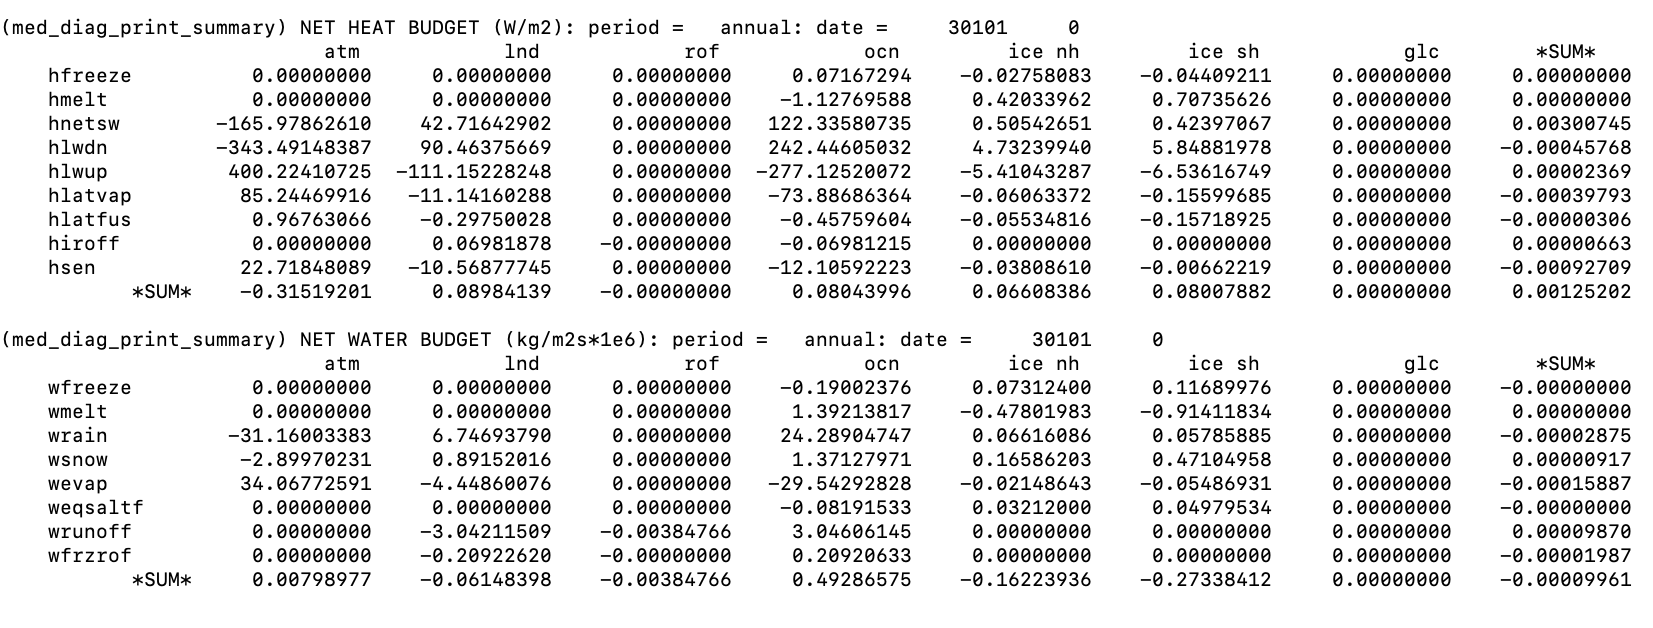

### Table vs MOM6

In [ ]:
heat_table = [0.07167294, -1.12769588, 122.33580735, 
              242.44605032-277.12520072, -73.88686364,
             -0.45759604, -0.06981215, -12.10592223]
heat_table_terms = ['hfreeze','hmelt','SW','LW','LAT_EVAP','LAT_FUS','HIROFF','SEN']
water_table = [0., 1.39213817, 24.28904747,
              1.37127971, -29.54292828, 0., 
              3.04606145, 0.20920633]
water_table_terms = ['wfreeze','wmelt','rain','snow','evap','weqsaltf','wrunoff','wfrzrof']

In [ ]:
heat_mom = np.zeros(len(heat_table))
area = 4*np.pi
# frazil or hfreeze
heat_mom[0] = ((frazil*med_area).sum())/area 
# hmelt
heat_mom[1] = ((seaice_melt_heat*med_area).sum())/area 
# SW
heat_mom[2] = ((SW*med_area).sum())/area 
# LW
heat_mom[3] = ((LW*med_area).sum())/area
# latent_evap
heat_mom[4] = ((latent_evap*med_area).sum())/area
# latent_fprec_diag
heat_mom[5] = ((latent_fprec_diag*med_area).sum())/area
# latent_frunoff
heat_mom[6] = ((latent_frunoff*med_area).sum())/area
# sensible
heat_mom[7] = ((sensible*med_area).sum())/area

In [ ]:
print('------------------ YEAR 2 --------------------')
print('{:>10s} {:>10s} {:>10s} {:>10s}'.format('VARIABLE','MOM6','TABLE','MOM-TABLE'))
print('----------------------------------------------')
for i in range(len(heat_mom)):
    print('{:>10s} {:10.6f} {:10.6f} {:10.6f}'.format(heat_table_terms[i],
        heat_mom[i],heat_table[i],heat_mom[i]-heat_table[i]))
print('----------------------------------------------')
print('{:>10s} {:10.6f} {:10.6f} {:10.6f}'.format('SUM',
        np.sum(heat_mom),np.sum(heat_table),
        np.sum(heat_mom)-np.sum(heat_table)))

In [ ]:
water_mom = np.zeros(len(water_table))

#water_table_terms = ['hfreeze','wmelt','rain','snow','evap','weqsaltf','wrunoff','wfrzrof']

# hfreeze
water_mom[0] = 0.0 #((frazil*med_area).sum())/area 
# wmelt
water_mom[1] = ((seaice_melt*med_area).sum())/area 
# rain
water_mom[2] = ((lprec*med_area).sum())/area 
# snow
water_mom[3] = ((fprec*med_area).sum())/area 
# evap
water_mom[4] = ((evap*med_area).sum())/area 
# water equivalent salt flux. Does this apply?
water_mom[5] = 0.0 #((salt_flux*med_area).sum())/area
# lrunoff
water_mom[6] = ((lrunoff*med_area).sum())/area
# frunoff
water_mom[7] = ((frunoff*med_area).sum())/area

In [ ]:
print('------------------ YEAR 2 --------------------')
print('{:>10s} {:>10s} {:>10s} {:>10s}'.format('VARIABLE','MOM6','TABLE','MOM-TABLE'))
print('----------------------------------------------')
for i in range(len(water_mom)):
    print('{:>10s} {:10.6f} {:10.6f} {:10.6f}'.format(water_table_terms[i],
        water_mom[i],water_table[i],water_mom[i]-water_table[i]))
print('----------------------------------------------')
print('{:>10s} {:10.6f} {:10.6f} {:10.6f}'.format('SUM',
        np.sum(water_mom),np.sum(water_table),
        np.sum(water_mom)-np.sum(water_table)))

### Change in heat content check

### Figures

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(24,16))
ax1 = ax.flatten()
plt.suptitle('Heat terms')
xyplot(frazil,grd.geolon, grd.geolat, grd.area_t, axis=ax1[0], title='frazil')
xyplot(heat_content_icemelt,grd.geolon, grd.geolat, grd.area_t, axis=ax1[1], title='heat_content_icemelt')
xyplot(seaice_melt_heat,grd.geolon, grd.geolat, grd.area_t, axis=ax1[2], title='seaice_melt_heat')

xyplot(SW,grd.geolon, grd.geolat, grd.area_t, axis=ax1[3], title='SW')
xyplot(LW,grd.geolon, grd.geolat, grd.area_t, axis=ax1[4], title='LW')
xyplot(sensible,grd.geolon, grd.geolat, grd.area_t, axis=ax1[5], title='sensible')

xyplot(latent_evap,grd.geolon, grd.geolat, grd.area_t, axis=ax1[6], title='latent_evap')
xyplot(latent_fprec_diag,grd.geolon, grd.geolat, grd.area_t, axis=ax1[7], title='latent_fprec_diag')
xyplot(latent_frunoff,grd.geolon, grd.geolat, grd.area_t, axis=ax1[8], title='latent_frunoff')

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,12))
ax1 = ax.flatten()
plt.suptitle('Heat balance')

xyplot(Heat_PmE,grd.geolon, grd.geolat, grd.area_t, axis=ax1[0], title='Heat_PmE')
xyplot(net_heat_surface,grd.geolon, grd.geolat, grd.area_t, axis=ax1[1], title='net_heat_surface')
xyplot(net_heat_coupler1+frazil,grd.geolon, grd.geolat, grd.area_t, axis=ax1[2], title='net_heat_coupler')
xyplot(net_heat_surface-(net_heat_coupler1+frazil),grd.geolon, grd.geolat, grd.area_t, axis=ax1[3], title='CPL - MOM6')